 Model Performance Metrics
Accuracy:  0.9036
Precision: 0.8500
Recall:    0.0464
F1 Score:  0.0881

 Detailed Classification Report
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3286
           1       0.85      0.05      0.09       366

    accuracy                           0.90      3652
   macro avg       0.88      0.52      0.52      3652
weighted avg       0.90      0.90      0.86      3652



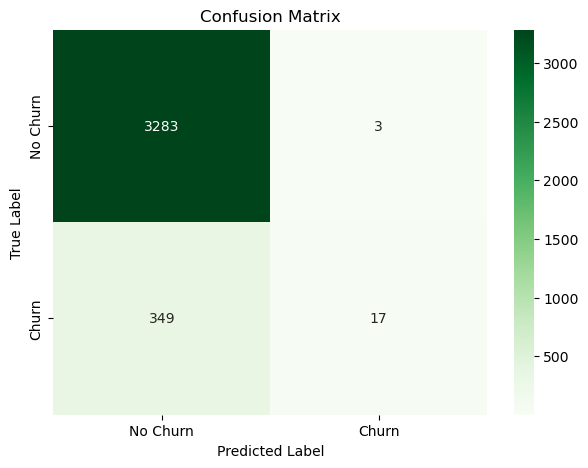

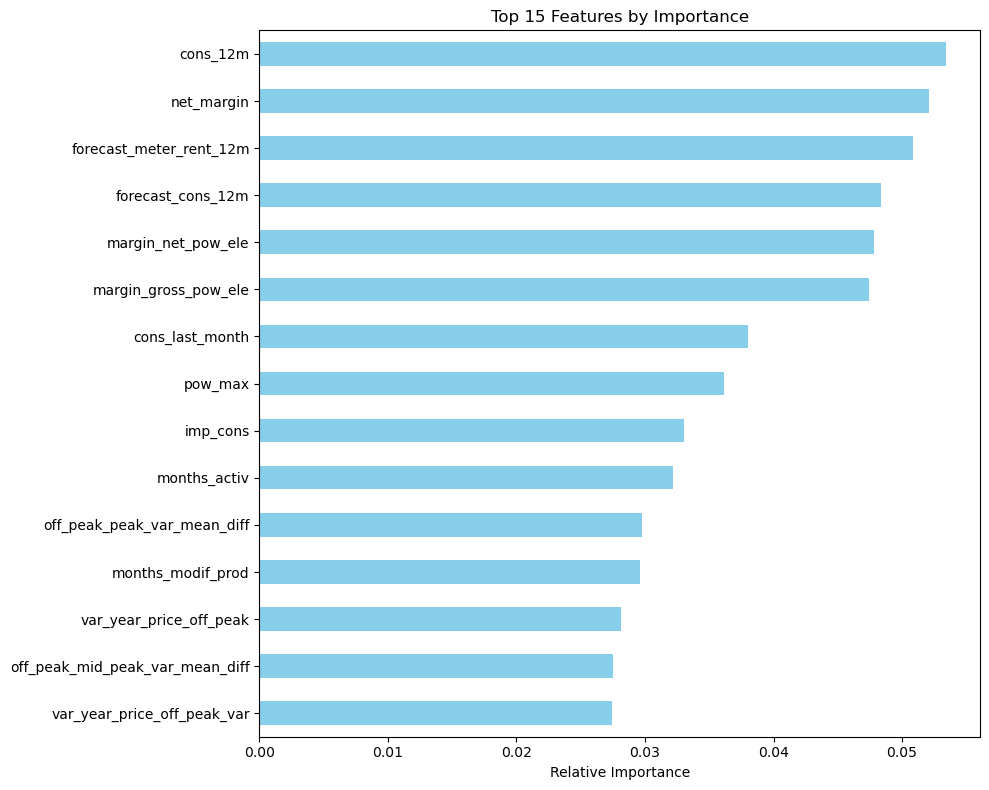

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

prediction_data = pd.read_csv('data_for_predictions.csv')


X = prediction_data.drop(columns=['id', 'churn', 'Unnamed: 0'])
y = prediction_data['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(" Model Performance Metrics")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

print("\n Detailed Classification Report")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(7, 5))
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('churn_confusion_matrix.png')

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 8))
feature_importances.head(15).plot(kind='barh', color='skyblue')
plt.title('Top 15 Features by Importance')
plt.xlabel('Relative Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('feature_importance.png')

